In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
path_to_data = "../../Challenge/data/"

In [2]:
x_train = genfromtxt(path_to_data + 'Xtr.csv', delimiter = ',')

In [3]:
y_train = genfromtxt(path_to_data + 'ytr.csv', delimiter = ',', skip_header=1)

In [4]:
x_test = genfromtxt(path_to_data + 'Xte.csv', delimiter = ',')

In [5]:
# reshape the arrays
def ar_reshape(array, image_size = 1024):
    reshaped_ar = array.T[:-1].T.reshape(len(array),3,image_size)
    result = np.empty([len(array), image_size, 3])
    for i in range(len(reshaped_ar)):
        result[i] = reshaped_ar[i].T
    return result

In [6]:
x_tr_rs = ar_reshape(x_train)
x_te_rs = ar_reshape(x_test)

In [7]:
# show images

def im_show(array, image_size = 1024):
    size = np.sqrt(image_size)
    reshaped_ar = array.reshape(size, size, 3)
    plt.gray()
    plt.imshow(reshaped_ar)
    plt.show()


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


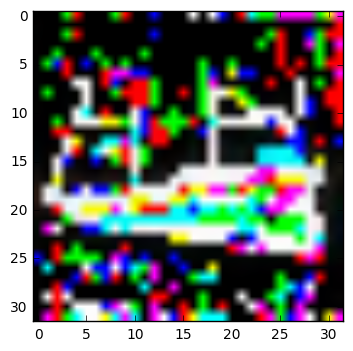

[ 1.  8.]


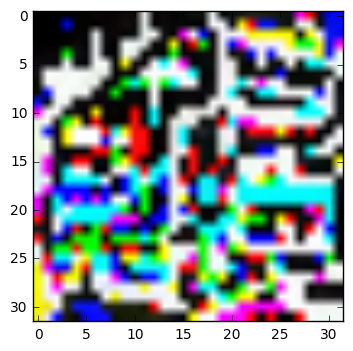

[ 2.  9.]


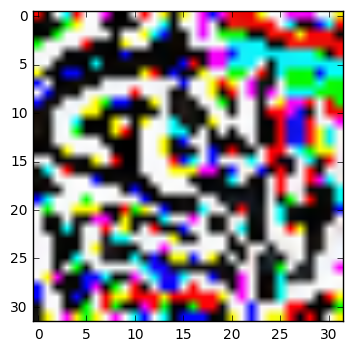

[ 3.  3.]


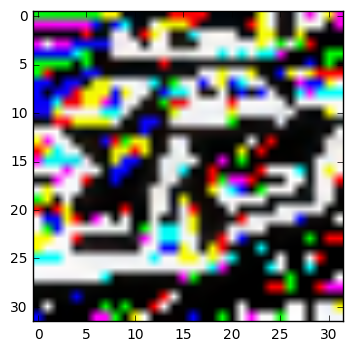

[ 4.  1.]


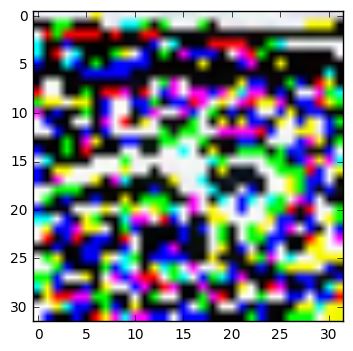

[ 5.  4.]


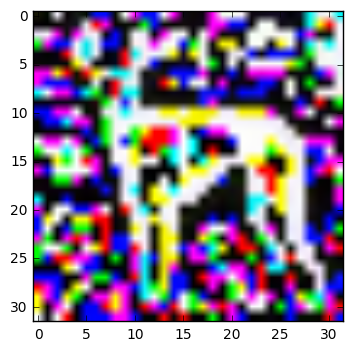

[ 6.  5.]


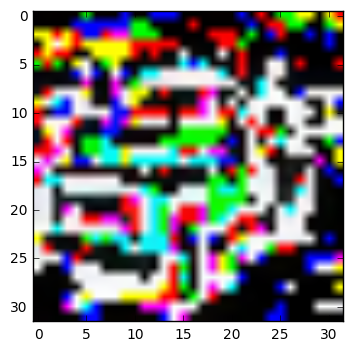

[ 7.  9.]


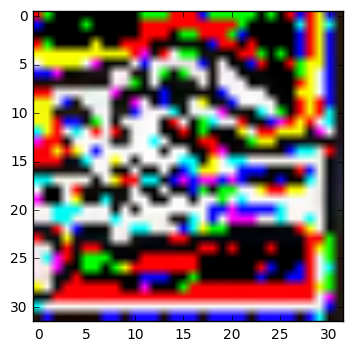

[ 8.  0.]


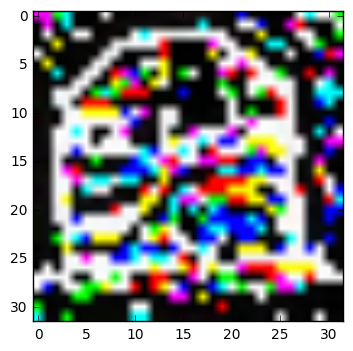

[ 9.  3.]


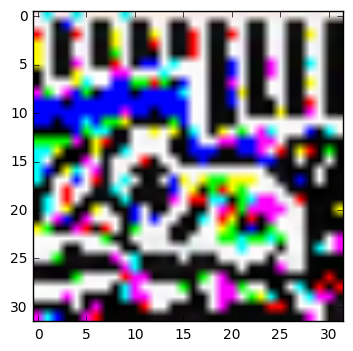

[ 10.   3.]


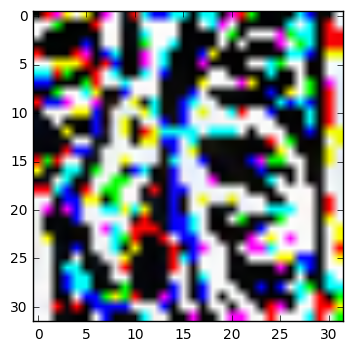

[ 11.   5.]


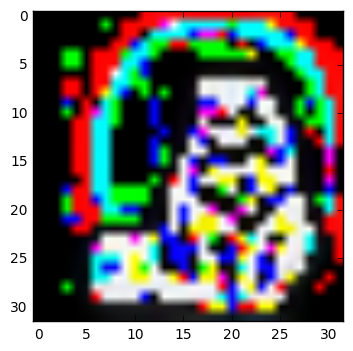

[ 12.   3.]


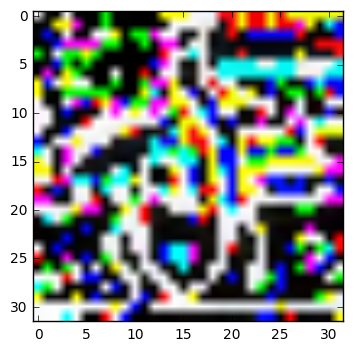

[ 13.   7.]


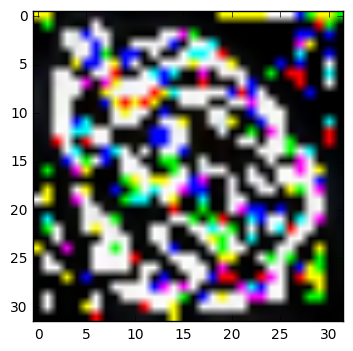

[ 14.   6.]


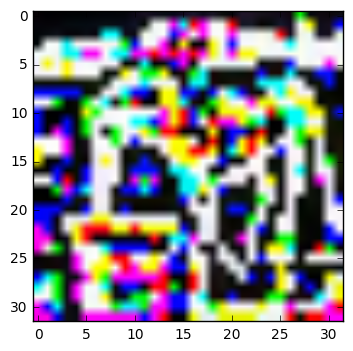

[ 15.   7.]


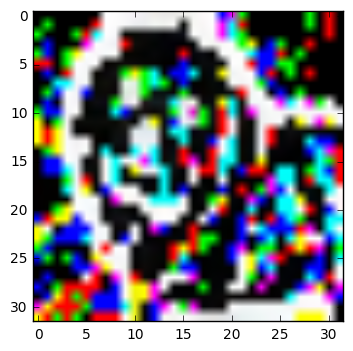

[ 16.   5.]


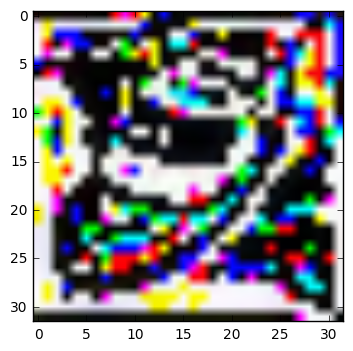

[ 17.   8.]


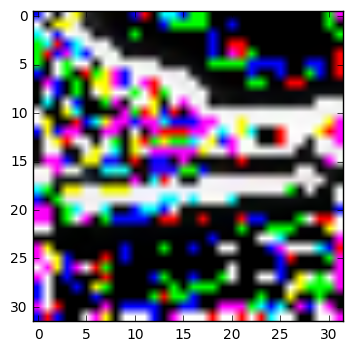

[ 18.   8.]


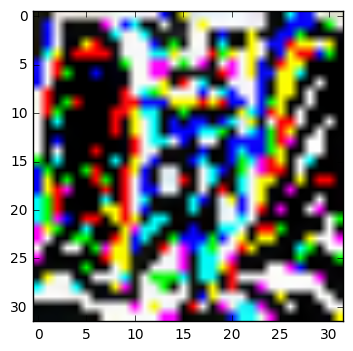

[ 19.   5.]


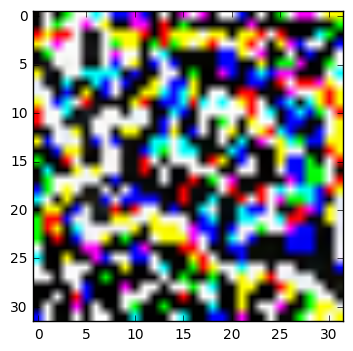

[ 20.   3.]


In [9]:
# afficher par niveaux
for i in range(20):
    im_show(x_tr_rs[i])
    print(y_train[i])

# Classification : basic SVM classifier with scikit learn

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3],
                     'C': [100]}]
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                     'C': [1, 10, 100, 1000]},
#                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']


for score in scores:
    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(x_train[:,:-1], y_train[:,-1])

    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    y_true, y_pred = y_test, clf.predict(x_test[:,:-1])
    print(classification_report(y_true, y_pred))
    print()

In [29]:
y_train

array([[  1.00000000e+00,   8.00000000e+00],
       [  2.00000000e+00,   9.00000000e+00],
       [  3.00000000e+00,   3.00000000e+00],
       ..., 
       [  4.99800000e+03,   1.00000000e+00],
       [  4.99900000e+03,   7.00000000e+00],
       [  5.00000000e+03,   5.00000000e+00]])

# Feature engineering is necessary